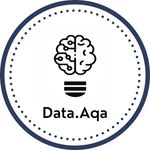 <center>

#  Efeito mandante
<br>
    Esse notebook será utilizado para analisar o efeito da saída do público dos estádios de futebol durante a pandemia do Covid-19. Será feito uma comparação entre os anos pré-2020 e 2020. Além disso, serão realizados testes estatísticos para avaliar se as mudanças foram significativas. <font color = #0879c4> O efeito mandante<font color = black> consiste, portanto, em avaliar se um time jogando em casa, com a torcida a seu favor, possui ou não vantagens sobre o time visitante.
<br> 
<br>
A primeira seção deste notebook consiste em uma apresentação dos dados e sua limpeza. Na segunda é realizado uma análise descritiva da tabela utilizada, obtendo os resultados para as proporções de vitória do mandante, visitante e empate para os dados no geral, antes e após a pandemia. Na terceira seção é feita uma análise por anos, utilizando as proporções encontradas para criar uma tabela. Por fim são realizados testes estatísticos para reconhecer a distribuição dos dados da amostra e para analisar se o efeito mandante se manteve durante a ausência do público.
<br> 

## Importando e limpando os dados

In [1]:
import pandas as pd
import basedosdados as bd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot

In [2]:
df = bd.read_table(dataset_id='mundo_transfermarkt_competicoes', 
table_id='brasileirao_serie_a',
billing_project_id="single-cistern-340001")

Downloading: 100%|█████████████████████████████████████████████████████████████| 7030/7030 [00:03<00:00, 2327.11rows/s]


In [3]:
df1 = df[['data','rodada','ano_campeonato','time_man', 'time_vis', 'gols_man','gols_vis']]

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030 entries, 0 to 7029
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data            7030 non-null   datetime64[ns]
 1   rodada          7030 non-null   int64         
 2   ano_campeonato  7030 non-null   int64         
 3   time_man        7030 non-null   object        
 4   time_vis        7030 non-null   object        
 5   gols_man        7029 non-null   float64       
 6   gols_vis        7029 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 384.6+ KB


In [5]:
df1[df1['gols_man'].isna()]

,data,rodada,ano_campeonato,time_man,time_vis,gols_man,gols_vis
5507,2016-12-11,38,2016,Chapecoense,Atlético-MG,NaN,NaN


In [6]:
df1.dropna(axis = 0, inplace = True)

In [7]:
df1.isna().any()

data              False
rodada            False
ano_campeonato    False
time_man          False
time_vis          False
gols_man          False
gols_vis          False
dtype: bool

In [8]:
df1 = df1.reset_index()
df1 = df1.drop(columns=['index'])

In [9]:
for registro in range(0,7029):
    if df1.loc[registro, 'gols_man'] > df1.loc[registro, 'gols_vis']:
        df1.loc[registro,'vencedor'] = 'mandante'
    elif df1.loc[registro, 'gols_man'] < df1.loc[registro, 'gols_vis']:
        df1.loc[registro, 'vencedor'] = 'visitante'
    else:
        df1.loc[registro, 'vencedor'] = 'empate'

In [10]:
df1

,data,rodada,ano_campeonato,time_man,time_vis,gols_man,gols_vis,vencedor
0,2003-03-29,1,2003,Guarani,Vasco da Gama,4.0,2.0,mandante
1,2003-03-29,1,2003,Atlético-PR,Grêmio,2.0,0.0,mandante
2,2003-03-30,1,2003,Flamengo,Coritiba FC,1.0,1.0,empate
3,2003-03-30,1,2003,Goiás EC,Paysandu SC,2.0,2.0,empate
4,2003-03-30,1,2003,Internacional,Ponte Preta,1.0,1.0,empate
...,...,...,...,...,...,...,...,...
7024,2021-02-26,38,2020,Internacional,Corinthians,0.0,0.0,empate
7025,2021-02-26,38,2020,EC Bahia,Santos FC,2.0,0.0,mandante
7026,2021-02-26,38,2020,Athletico-PR,Sport Recife,2.0,0.0,mandante
7027,2021-02-26,38,2020,Ceará SC,Botafogo,2.0,1.0,mandante


## Panorama geral

In [11]:
vencedores_mandantes = df1[df1['vencedor'] == 'mandante'].count()
vencedores_visitantes = df1[df1['vencedor'] == 'visitante'].count()
empate = df1[df1['vencedor'] == 'empate'].count()
print('Mandantes: {}|Visitentes: {}|Empate: {}'.format(vencedores_mandantes[0], vencedores_visitantes[0], empate[0]))

Mandantes: 3522|Visitentes: 1652|Empate: 1855


### Proporções panorama geral

In [12]:
prop_mandante_geral = (vencedores_mandantes[0]/df1.count()[0])*100
prop_visitante_geral = (vencedores_visitantes[0]/df1.count()[0])*100
prop_empate_geral = (empate[0]/df1.count()[0])*100
print('Proporção mandantes: {}|Proporção visitantes: {}|Proporção empate: {}'.format(prop_mandante_geral, prop_visitante_geral, prop_empate_geral))

Proporção mandantes: 50.106700810926164|Proporção visitantes: 23.502631953336177|Proporção empate: 26.39066723573766


## Antes da pandemia (2003 a 2019)

In [13]:
df1_antes = df1[df1['ano_campeonato']<2020]

In [14]:
mandante_antes = df1_antes[df1_antes['vencedor'] == 'mandante'].count()
visitante_antes = df1_antes[df1_antes['vencedor'] == 'visitante'].count()
empate_antes = df1_antes[df1_antes['vencedor'] == 'empate'].count()
print('Mandantes: {}|Visitantes: {}|Empate: {}'.format(mandante_antes[0], visitante_antes[0], empate_antes[0]))

Mandantes: 3351|Visitantes: 1551|Empate: 1747


### Proporções de antes da pandemia (geral)

In [15]:
prop_mandante_antes = (mandante_antes[0]/df1_antes.count()[0])*100
prop_visitante_antes = (visitante_antes[0]/df1_antes.count()[0])*100
prop_empate_antes = (empate_antes[0]/df1_antes.count()[0])*100
print('Proporção mandantes: {}|Proporção visitantes: {}|Proporção empate: {}'.format(prop_mandante_antes, prop_visitante_antes, prop_empate_antes))

Proporção mandantes: 50.39855617386073|Proporção visitantes: 23.3268160625658|Proporção empate: 26.27462776357347


## Depois da pandemia (2020)

In [16]:
df1_depois = df1[df1['ano_campeonato'] == 2020]

In [17]:
mandante_depois = df1_depois[df1_depois['vencedor'] == 'mandante'].count()
visitante_depois = df1_depois[df1_depois['vencedor'] == 'visitante'].count()
empate_depois = df1_depois[df1_depois['vencedor'] == 'empate'].count()
print('Mandantes: {}|Visitantes: {}|Empate: {}'.format(mandante_depois[0], visitante_depois[0], empate_depois[0]))

Mandantes: 171|Visitantes: 101|Empate: 108


### Proporções depois da pandemia

In [18]:
prop_mandante_depois = (mandante_depois[0]/df1_depois.count()[0])*100
prop_visitante_depois = (visitante_depois[0]/df1_depois.count()[0])*100
prop_empate_depois = (empate_depois[0]/df1_depois.count()[0])*100
print('Proporção mandantes: {}|Proporção visitantes: {}|Proporção empate: {}'.format(prop_mandante_depois, prop_visitante_depois, prop_empate_depois))

Proporção mandantes: 45.0|Proporção visitantes: 26.57894736842105|Proporção empate: 28.421052631578945


## Análise por anos

In [19]:
anos = df1['ano_campeonato'].unique().tolist()

In [20]:
def informacao(ano):
    df5 = df1[df1['ano_campeonato'] == ano]
    mandante = df5[df5['vencedor'] == 'mandante'].count()
    visitante = df5[df5['vencedor'] == 'visitante'].count()
    empate = df5[df5['vencedor'] == 'empate'].count()
    prop_mandante1 = (mandante[0]/df5.count()[0])*100
    prop_visitante1 = (visitante[0]/df5.count()[0])*100
    prop_empate1 = (empate[0]/df5.count()[0])*100
    return [prop_mandante1, prop_visitante1, prop_empate1]

In [21]:
informacao(2003)

[53.50877192982456, 19.736842105263158, 26.75438596491228]

In [22]:
proporcao = pd.DataFrame()

In [23]:
for a in anos:
    proporcao.loc[a,'mandante'] = informacao(a)[0]
    proporcao.loc[a,'visitante'] = informacao(a)[1]
    proporcao.loc[a,'empate'] = informacao(a)[2]

In [24]:
proporcao

,mandante,visitante,empate
2003,53.508772,19.736842,26.754386
2004,51.315789,22.587719,26.096491
2005,49.282297,27.511962,23.205742
2006,50.000000,24.473684,25.526316
2007,50.526316,25.789474,23.684211
2008,54.736842,20.000000,25.263158
2009,51.315789,21.842105,26.842105
2010,47.105263,21.842105,31.052632
2011,48.421053,23.947368,27.631579
2012,48.157895,24.210526,27.631579


In [25]:
mandante_media = proporcao['mandante'].mean()
mandante_std = np.std(proporcao['mandante'])
visitante_media = proporcao['visitante'].mean()
visitante_std = np.std(proporcao['visitante'])
empate_media = proporcao['empate'].mean()
empate_std = np.std(proporcao['empate'])
print('Mandante média: {} | Mandante desvio padrão: {}'.format(mandante_media, mandante_std))
print('Visitante média: {} | Visitante desvio padrão: {}'.format(visitante_media, visitante_std))
print('Empate média: {} | Empate desvio padrão: {}'.format(empate_media, empate_std))

Mandante média: 50.06051231193573 | Mandante desvio padrão: 2.896291223365169
Visitante média: 23.532131363161778 | Visitante desvio padrão: 2.7326369990195882
Empate média: 26.407356324902498 | Empate desvio padrão: 2.0223508796831466


## Testes estatísticos

### Teste de Shapiro

H0: não é diferente de uma distribuição normal

In [26]:
shapiro_mandante = scipy.stats.shapiro(proporcao['mandante'])
shapiro_visitante = scipy.stats.shapiro(proporcao['visitante'])
shapiro_empate = scipy.stats.shapiro(proporcao['empate'])
print(f'p-valor Mandante: {shapiro_mandante[1]}, p-valor Visitante: {shapiro_visitante[1]}, p-valor Empate: {shapiro_empate[1]}')

p-valor Mandante: 0.676895797252655, p-valor Visitante: 0.9969305396080017, p-valor Empate: 0.8717553615570068


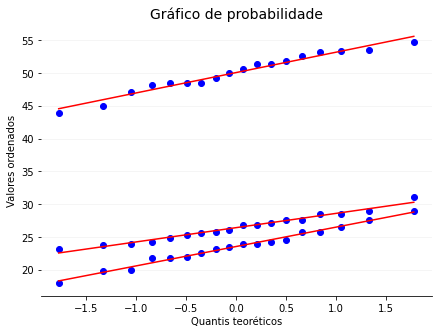

In [27]:
fig, ax = plt.subplots(figsize = (7,5))
scipy.stats.probplot(proporcao['mandante'], dist="norm", plot=plt)
scipy.stats.probplot(proporcao['visitante'], dist="norm", plot=plt)
scipy.stats.probplot(proporcao['empate'], dist="norm", plot=plt)
ax.set_title('Gráfico de probabilidade', fontsize = 14)
ax.set_ylabel('Valores ordenados')
ax.set_xlabel('Quantis teoréticos')
spines = ['top', 'left', 'right']
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.grid(axis = 'y', alpha = .15)
plt.show()

## Plotando distribuições

A figura abaixo é um histograma, que é um tipo de gráfico que representa uma ou mais variáveis contando o número de observações que se encaixam nas "caixas" discretas (os bins).

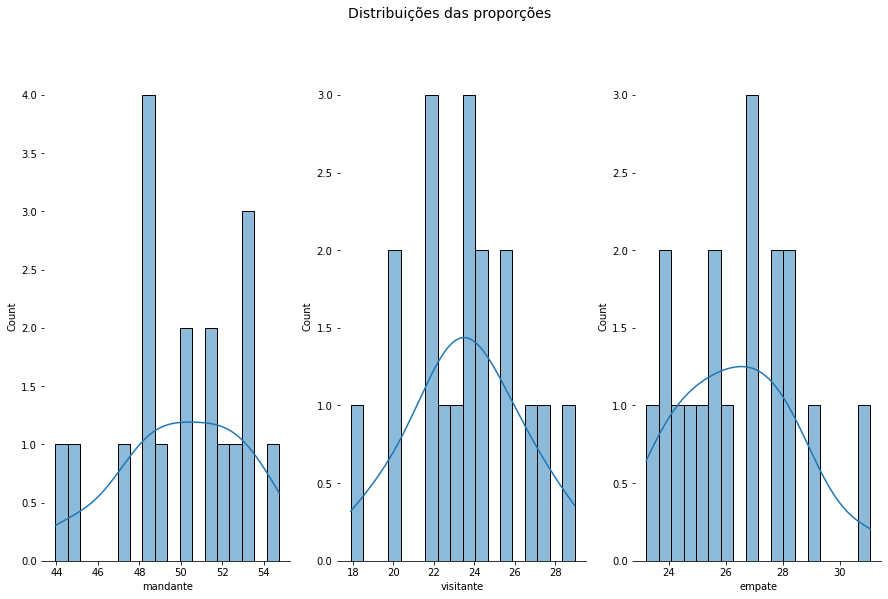

In [28]:
fig, axes = plt.subplots(1, 3, figsize = (15, 9))
sns.histplot(ax=axes[0], data = proporcao['mandante'], kde = True, bins = 18)
sns.histplot(ax=axes[1], data = proporcao['visitante'], kde = True, bins = 18)
sns.histplot(ax=axes[2], data = proporcao['empate'], kde = True, bins = 18)
fig.suptitle('Distribuições das proporções', fontsize = 14)
sns.despine(left=True)

plt.show()

<h3> Teste t de student <h3>

$$
H_0:\:\mu _1=\mu _2
$$
$$
H_1:\:\mu _1\ne \mu _2
$$

In [29]:
amostra1 = proporcao[['mandante']].loc[2003:2019]

In [31]:
teste_t = scipy.stats.ttest_1samp(amostra1, informacao(2020)[0])

In [32]:
teste_t

Ttest_1sampResult(statistic=array([7.93972868]), pvalue=array([6.11626591e-07]))

In [33]:
alfa = 0.05
if teste_t[1]<alfa:
    print('Rejeita-se a hipótese nula do teste T, há indícios de que a média seja diferente para o p-valor {}'.format(teste_t[1]))
else: 
    print('Aceita-se a hipótese nula do teste T, há indícios de que as médias sejam iguais para o p-valor {}'.format(teste_t[1]))

Rejeita-se a hipótese nula do teste T, há indícios de que a média seja diferente para o p-valor [6.11626591e-07]


## Referências

<br>Teste de hipóteses (ttest): <br> <http://cmq.esalq.usp.br/wiki/lib/exe/fetch.php?media=publico:syllabvs:lcf5759:proc_ttest-_teste_de_hipoteses.pdf>
<br> Teste de Shapiro <br> <http://www.uel.br/projetos/experimental/pages/arquivos/Shapiro.html>
<br> Efeito mandante <br> <https://www.nexojornal.com.br/ensaio/2021/A-covid-19-acabou-com-o-%E2%80%98efeito-mandante%E2%80%99-no-Brasileir%C3%A3o#:~:text=Para%20estimar%20o%20efeito%20mandante,para%20ano%2C%20m%C3%AAs%20e%20hor%C3%A1rio>